## Importing necessary libraries

In [26]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings 
import tensorflow as tf
import h5py
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score


warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


np.random.seed(1)
tf.random.set_seed(1)

## Loading the dataset

In [27]:
df = pd.read_csv('Mold_Asthma_Data.csv',header = 1)


# Remove rows where the 'Sample Number' column is 'H49'
df = df[df['Sample Number'] != 'H49']



Asthma_features = [
'Sampler State',
'Indoor total spores', 
'Outdoor total spores',
'Smoking at home', 
'Pre-existing Respiratory Symptoms',
'Pre-existing Respiratory Severity',
'Post-Hurricane Respiratory Symptoms',
'Post-Hurricane Respiratory Severity', 
'Blower Door Test at 50 Pa', 
                    'Maximum flood depth', 
                    'How often residences open window blinds', 
                    'Roof age', 
                    'Average Bathroom Exhaust Fan Airflow Rates', 
]



df= df[Asthma_features]

df

,Sampler State,Indoor total spores,Outdoor total spores,Smoking at home,Pre-existing Respiratory Symptoms,Pre-existing Respiratory Severity,Post-Hurricane Respiratory Symptoms,Post-Hurricane Respiratory Severity,Blower Door Test at 50 Pa,Maximum flood depth,How often residences open window blinds,Roof age,Average Bathroom Exhaust Fan Airflow Rates
0,Louisiana,1200,2200,Yes,"Nose Conjestion,Runny Nose,Sore Throat,Body Ac...",32.0,"Nose Congestion,Coughing,Runny nose,Sore throa...",0.0,2608.000000,4.20,37.5,9,32.000000
1,Louisiana,440,1500,No,Nose Conjestion,0.0,NaN,0.0,1614.250000,3.30,87.5,9,42.000000
2,Louisiana,53,510,No,"Other, please specify",0.0,NaN,0.0,2102.250000,3.70,87.5,13,39.500000
3,Louisiana,3900,1600,No,"Coughing,Wheezing,Shortness of Breath",0.0,"Coughing,Wheezing,Shortness of breath",15.0,4005.714286,2.70,62.5,19,38.333333
4,Louisiana,0,6100,No,"Other, please specify",0.0,NaN,0.0,3738.200000,0.70,37.5,15,31.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Florida,27,2100,Yes,"Other, please specify",0.0,NaN,0.0,914.000000,0.00,87.5,20,0.000000
59,Florida,130,2500,No,"Nose Conjestion,Coughing,Runny Nose,Sore Throa...",8.0,"Nose Congestion,Coughing,Runny nose,Sore throa...",0.0,805.600000,0.00,100.0,25,0.000000
60,Florida,53,810,No,"Other, please specify",0.0,NaN,0.0,959.000000,0.00,100.0,20,0.000000
61,Florida,320,9000,Yes,"Other, please specify",0.0,NaN,0.0,758.000000,0.96,37.5,21,19.000000


## Converting the 'Pre-existing Respiratory Symptoms' descriptions into binary columns for each system type, indicating the presence or absence of each system

In [28]:
import pandas as pd

# Define a function to map values to Yes or No
def map_values(value):
    if pd.isna(value) or value == 'Other, please specify' or value.lower() == 'N/A':
        return 'No'
    else:
        return 'Yes'

# Apply the function to the specified columns
columns_to_transform = ['Pre-existing Respiratory Symptoms']

df[columns_to_transform] = df[columns_to_transform].applymap(map_values)

df['Pre-existing Respiratory Symptoms']

0     Yes
1     Yes
2      No
3     Yes
4      No
     ... 
58     No
59    Yes
60     No
61     No
62    Yes
Name: Pre-existing Respiratory Symptoms, Length: 62, dtype: object

## Defining 'Yes' for having any new symptoms, and 'No' for no new symptoms, or if the values are empty or none. 

In [29]:
import pandas as pd

# Define a function to map values to Yes or No
def map_values(value):
    if pd.isna(value) or value == '' or value.lower() == 'none':
        return 'No'
    else:
        return 'Yes'

# Apply the function to the specified columns
columns_to_transform = ['Post-Hurricane Respiratory Symptoms']

df[columns_to_transform] = df[columns_to_transform].applymap(map_values)


## Seperating numerical and categorical columns

In [30]:
# Create empty lists to store the names of categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Iterate through each column in the DataFrame
for column in df.columns:
    # Exclude the 'Sampler State' from being categorized incorrectly
    if column != 'Sampler State':
        if df[column].dtype == 'object':
            # If the data type is 'object', consider it categorical
            categorical_columns.append(column)
        else:
            # Consider other data types as numerical
            numerical_columns.append(column)


# Print the list of categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['Smoking at home', 'Pre-existing Respiratory Symptoms', 'Post-Hurricane Respiratory Symptoms']

Numerical Columns:
['Indoor total spores', 'Outdoor total spores', 'Pre-existing Respiratory Severity', 'Post-Hurricane Respiratory Severity', 'Blower Door Test at 50 Pa', 'Maximum flood depth', 'How often residences open window blinds', 'Roof age', 'Average Bathroom Exhaust Fan Airflow Rates']


## Plot categorical features

Smoking at home
No     52
Yes    10
Name: Smoking at home, dtype: int64


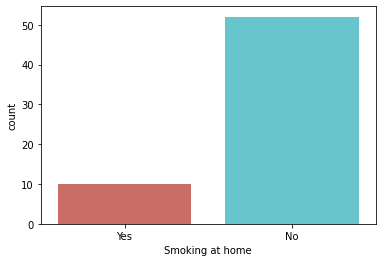

Percentage of 0: 83.87%
Percentage of 1: 16.13%
Percentage of missing value: 0.00%
------------------
Pre-existing Respiratory Symptoms
No     32
Yes    30
Name: Pre-existing Respiratory Symptoms, dtype: int64


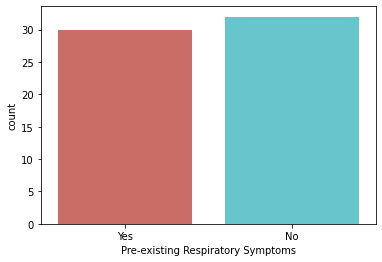

Percentage of 0: 51.61%
Percentage of 1: 48.39%
Percentage of missing value: 0.00%
------------------
Post-Hurricane Respiratory Symptoms
Yes    32
No     30
Name: Post-Hurricane Respiratory Symptoms, dtype: int64


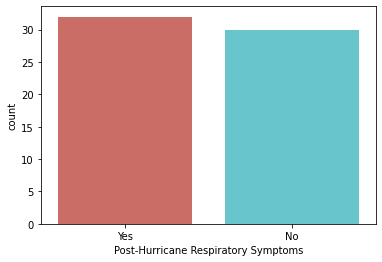

Percentage of 0: 51.61%
Percentage of 1: 48.39%
Percentage of missing value: 0.00%
------------------


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and display the percentages for each feature
for feature_name in categorical_columns:
    feature_count = df[feature_name].value_counts(dropna=False)
    
    print(feature_name)
    print(feature_count)
    
    sns.countplot(x=feature_name, data=df, palette="hls")
    #plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.show()
    
    n_records = df.shape[0]
    p_0 = feature_count.get(0, 0) / n_records
    p_1 = feature_count.get(1, 0) / n_records
    p_missing = df[feature_name].isna().sum() / n_records
    
    print(f'Percentage of 0: {p_0:.2%}')
    print(f'Percentage of 1: {p_1:.2%}')
    print(f'Percentage of missing value: {p_missing:.2%}')
    print('------------------')


## Plot numerical features

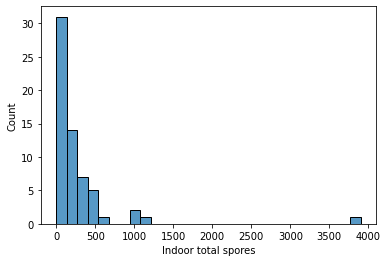

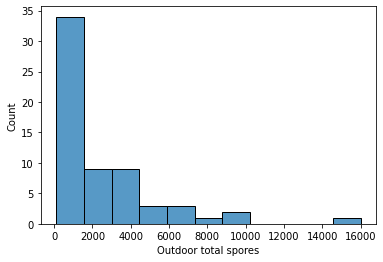

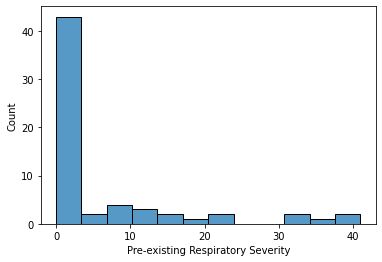

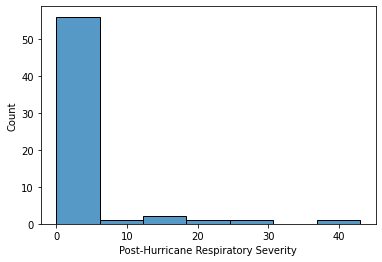

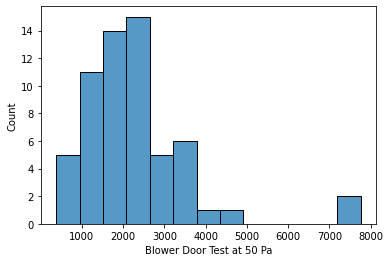

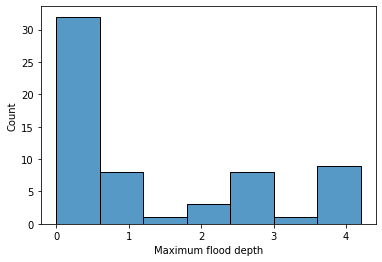

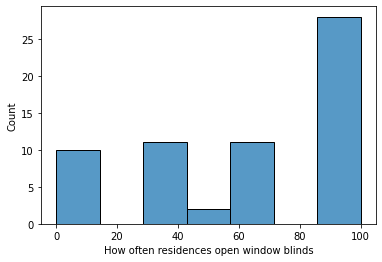

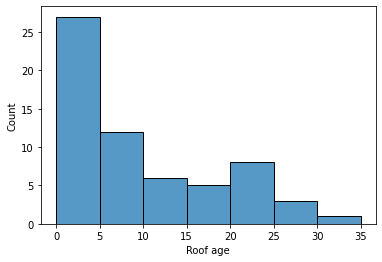

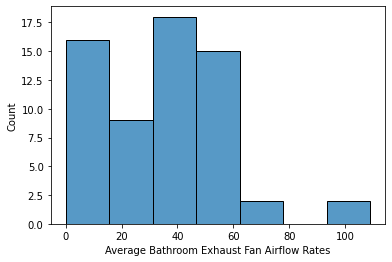

In [32]:
for feature_name in numerical_columns:
    
    sns.histplot(df[feature_name])
    plt.show()


## Checking for any missing data

In [33]:
df.isnull().sum()

Sampler State                                 0
Indoor total spores                           0
Outdoor total spores                          0
Smoking at home                               0
Pre-existing Respiratory Symptoms             0
Pre-existing Respiratory Severity             0
Post-Hurricane Respiratory Symptoms           0
Post-Hurricane Respiratory Severity           0
Blower Door Test at 50 Pa                     2
Maximum flood depth                           0
How often residences open window blinds       0
Roof age                                      0
Average Bathroom Exhaust Fan Airflow Rates    0
dtype: int64

## Filling null values in categorical features with the mode (most frequent value) and fill null values in numerical features with the median

In [34]:
for feature_name in categorical_columns:
    df[feature_name].fillna(df[feature_name].mode()[0], inplace=True)

for feature_name in numerical_columns:
    df[feature_name].fillna(df[feature_name].median(),inplace = True)
    
df.isnull().sum()

Sampler State                                 0
Indoor total spores                           0
Outdoor total spores                          0
Smoking at home                               0
Pre-existing Respiratory Symptoms             0
Pre-existing Respiratory Severity             0
Post-Hurricane Respiratory Symptoms           0
Post-Hurricane Respiratory Severity           0
Blower Door Test at 50 Pa                     0
Maximum flood depth                           0
How often residences open window blinds       0
Roof age                                      0
Average Bathroom Exhaust Fan Airflow Rates    0
dtype: int64

## Right tail treatment

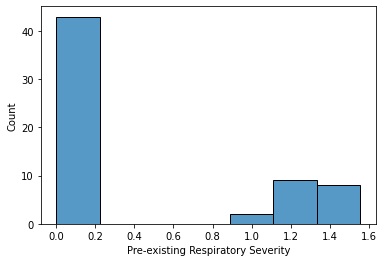

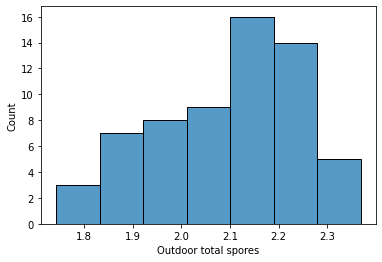

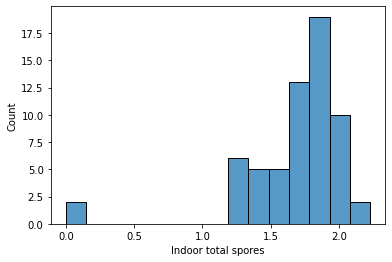

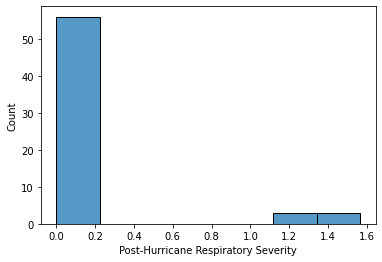

In [36]:
import numpy as np

# based on the distribution plots of numerical features, list ones with right skewness

Right_tail_list = [
'Pre-existing Respiratory Severity' ,
'Outdoor total spores',
'Indoor total spores' ,
'Post-Hurricane Respiratory Severity',
                  ]

epsilon=1
for col in Right_tail_list:
    df[col]=np.log(epsilon+df[col])
    sns.histplot(df[col])
    plt.show()

## Converting categorical values to numbers

In [37]:
# Create a mapping dictionary to convert categories to numbers
category_to_number = {}

# Initialize a variable to assign unique numbers to categories
number = 0

# Iterate through each column in categorical_columns
for column in categorical_columns:
    unique_categories = df[column].unique()
    for category in unique_categories:
        if category not in category_to_number:
            category_to_number[category] = number
            number += 1


# Apply the mapping to convert categories to numbers for each column
for column in categorical_columns:
    df[column] = df[column].map(category_to_number)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Sampler State                               62 non-null     object 
 1   Indoor total spores                         62 non-null     float64
 2   Outdoor total spores                        62 non-null     float64
 3   Smoking at home                             62 non-null     int64  
 4   Pre-existing Respiratory Symptoms           62 non-null     int64  
 5   Pre-existing Respiratory Severity           62 non-null     float64
 6   Post-Hurricane Respiratory Symptoms         62 non-null     int64  
 7   Post-Hurricane Respiratory Severity         62 non-null     float64
 8   Blower Door Test at 50 Pa                   62 non-null     float64
 9   Maximum flood depth                         62 non-null     float64
 10  How often reside

## Scaling the data

In [38]:
# Feature scaling (using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# end your code here
df.shape

(62, 13)

In [39]:
df.to_csv('asthma_scaled-final.csv', index=False)

## Geting Pearson correlation among different categories

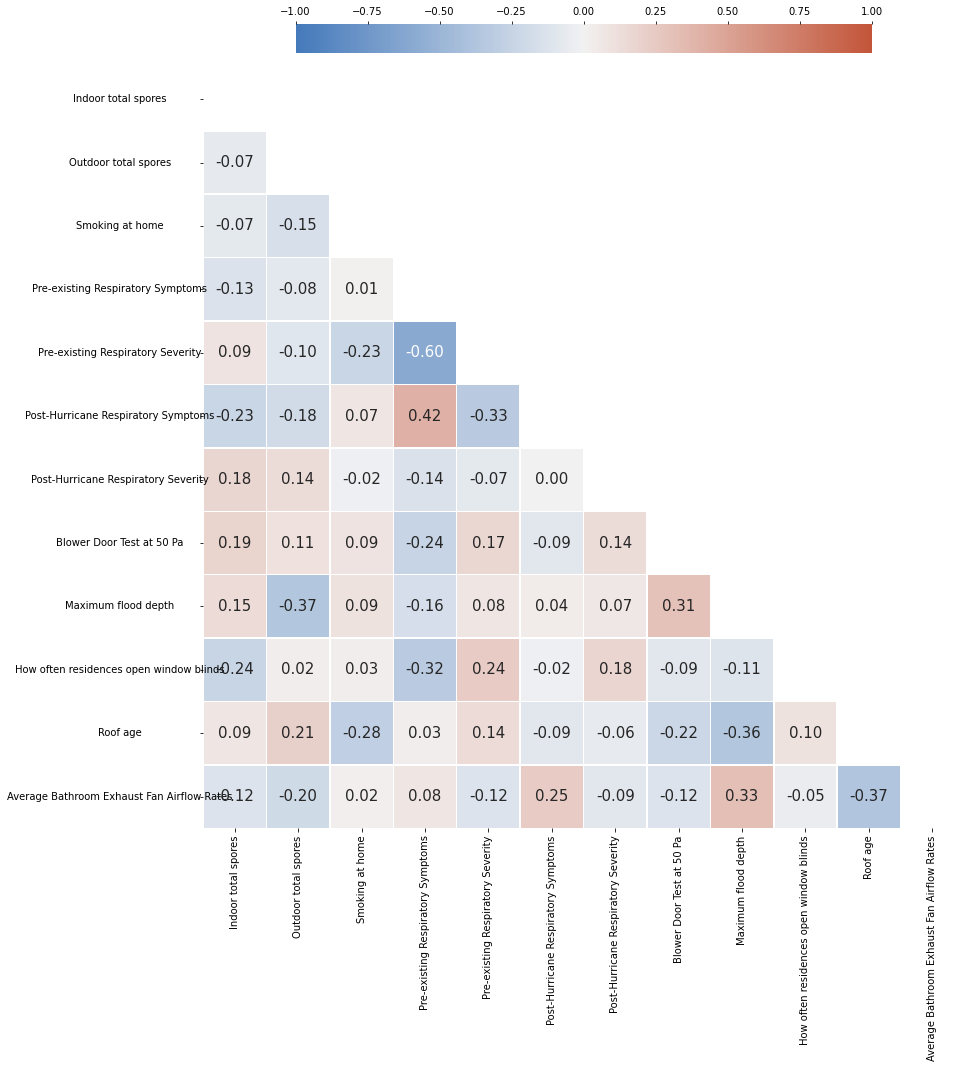

In [40]:
# Compute correlation matrix
corr = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cbar_kws={"shrink": .5, "orientation": "horizontal"},  # Set the colorbar to be horizontal
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    ax=ax,
    annot_kws={"size": 15}  # Adjust font size here
)

# Adjust the position of the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.set_position([ax.get_position().x0, ax.get_position().y1 + 0.01, ax.get_position().width, 0.02])
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


# Adjust the position of the color bar
cbar = ax.collections[0].colorbar
cbar.ax.set_position([ax.get_position().x0, ax.get_position().y1 + 0.01, ax.get_position().width, 0.02])

for label in ax.get_yticklabels():
    label.set_horizontalalignment('center')
    # Get the current position of the label, which is a tuple (x,y)
    x, y = label.get_position()
    # Set a new position (x-shift, y)
    label.set_position((x - 0.1, y))  # adjust 0.1 as needed to shift the label left

# Save the plot as an image with high resolution
#plt.savefig('Pearson.png', dpi=300)
plt.show()

# Close the plot
plt.close()


In [41]:
# Filter highly correlated features
high_corr_features = corr[(abs(corr) > 0.5) & (corr != 1.0)].stack().reset_index()

high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Drop duplicate rows where Feature 1 and Feature 2 are swapped
high_corr_features = high_corr_features.loc[high_corr_features['Feature 1'] < high_corr_features['Feature 2']]

# Add a column indicating the feature with higher absolute correlation with 'height_abo'
high_corr_features['Lower Correlation'] = high_corr_features.apply(lambda row: row['Feature 1'] if abs(corr.loc[row['Feature 1'], 'Post-Hurricane Respiratory Symptoms']) < abs(corr.loc[row['Feature 2'], 'Post-Hurricane Respiratory Symptoms']) else row['Feature 2'], axis=1)

# Sort the highly correlated features by absolute correlation coefficient in descending order
high_corr_features = high_corr_features.sort_values('Correlation', key=lambda x: abs(x), ascending=False)

# Print highly correlated features
print(high_corr_features)

                           Feature 1                          Feature 2  \
1  Pre-existing Respiratory Severity  Pre-existing Respiratory Symptoms   

   Correlation                  Lower Correlation  
1    -0.598009  Pre-existing Respiratory Severity  


## Bar plot for features correlations with the target variable (new symptoms)

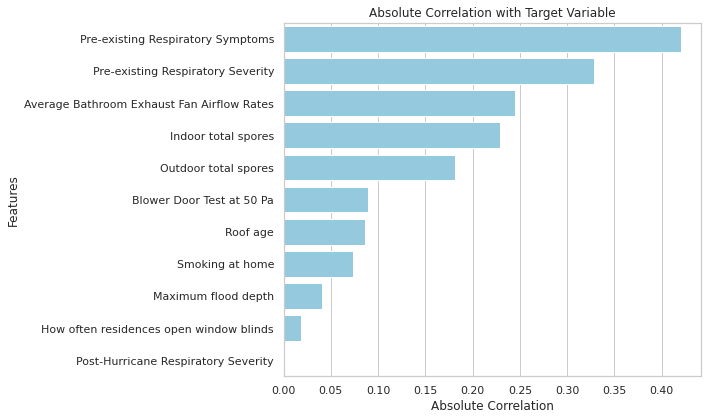

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the absolute correlation values with 'D_1daybefo'
corr_with_target = corr['Post-Hurricane Respiratory Symptoms'].abs()

# Sort the features based on absolute correlation
sorted_features = corr_with_target.sort_values(ascending=False)
sorted_features = sorted_features.drop('Post-Hurricane Respiratory Symptoms')

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index, color='skyblue')  # Swap x and y
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')  
plt.title('Absolute Correlation with Target Variable')

# Display the plot
plt.tight_layout()
plt.show()


## Selecting important features for the analysis based on correlation matrix and forward feature selection

In [44]:
selected_features =     [
'Indoor total spores', 
'Outdoor total spores',
'Smoking at home', 
# 'Pre-existing Respiratory Symptoms',
# 'Pre-existing Respiratory Severity',
# 'Post-Hurricane Respiratory Severity', 
'Blower Door Test at 50 Pa', 
                    'Maximum flood depth', 
                    'How often residences open window blinds', 
                    'Roof age', 
                    'Average Bathroom Exhaust Fan Airflow Rates', 
    ]

## Spliting the train and test dataset

In [45]:
from sklearn.model_selection import train_test_split


X = np.float32(df[selected_features].values)
Y= df['Post-Hurricane Respiratory Symptoms']

# Split data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

## Classification MLP model developement

In [46]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the input layer
inputs = tf.keras.Input(shape=(Xtrain.shape[1],))

# Define the hidden layers
hidden = tf.keras.layers.Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=1),
                              bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L1(0.001))(inputs)
# hidden = tf.keras.layers.BatchNormalization(gamma_initializer='ones')(hidden)

hidden = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=1),
                              bias_initializer='zeros', kernel_regularizer=tf.keras.regularizers.L1(0.001))(hidden)
# hidden = tf.keras.layers.BatchNormalization(gamma_initializer='ones')(hidden)

# Define the output layer for binary classification
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)

# Create the model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_loss'] < 0.7 and logs['loss'] < 0.7:
            self.model.stop_training = True

# Create an instance of the custom callback
custom_early_stopping = CustomEarlyStopping()

# Define model checkpointing
model_checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

# Reduce learning rate in the ExponentialDecay setup
lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  
    decay_steps=150,
    decay_rate=0.92,
    staircase=True
)


# Compile the model for binary classification
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    loss='binary_crossentropy',  
    metrics=['accuracy']  
)

# Train your model
history = model.fit(
    Xtrain,
    Ytrain,
    batch_size=8,
    epochs=1000,
    validation_data=(Xtest, Ytest),
    callbacks=[custom_early_stopping, model_checkpoint]
)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 36ms/step - loss: 1.0063 - accuracy: 0.4898 - val_loss: 0.9539 - val_accuracy: 0.4615
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.0021 - accuracy: 0.4898 - val_loss: 0.9500 - v

Epoch 53/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9093 - accuracy: 0.4898 - val_loss: 0.8590 - val_accuracy: 0.4615
Epoch 54/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9083 - accuracy: 0.4898 - val_loss: 0.8576 - val_accuracy: 0.4615
Epoch 55/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9071 - accuracy: 0.4898 - val_loss: 0.8563 - val_accuracy: 0.4615
Epoch 56/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9059 - accuracy: 0.4898 - val_loss: 0.8554 - val_accuracy: 0.4615
Epoch 57/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9049 - accuracy: 0.4898 - val_loss: 0.8547 - val_accuracy: 0.4615
Epoch 58/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.9043 - accuracy: 0.4898 - val_loss: 0.8542 - val_accuracy: 0.4615
Epoch 59/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9037 - accuracy: 0.4898 - val_loss: 0.8536 - val_accuracy: 0.4615
Epoch 60/1000

7/7 [==============================] - 0s 8ms/step - loss: 0.8733 - accuracy: 0.5510 - val_loss: 0.8258 - val_accuracy: 0.5385
Epoch 112/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8728 - accuracy: 0.5510 - val_loss: 0.8254 - val_accuracy: 0.4615
Epoch 113/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8724 - accuracy: 0.5510 - val_loss: 0.8249 - val_accuracy: 0.4615
Epoch 114/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8720 - accuracy: 0.5510 - val_loss: 0.8247 - val_accuracy: 0.4615
Epoch 115/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8717 - accuracy: 0.5510 - val_loss: 0.8245 - val_accuracy: 0.4615
Epoch 116/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8713 - accuracy: 0.5510 - val_loss: 0.8241 - val_accuracy: 0.4615
Epoch 117/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8709 - accuracy: 0.5510 - val_loss: 0.8237 - val_accuracy: 0.4615
Epoch 118/1000
7/7 [=

Epoch 169/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8554 - accuracy: 0.5918 - val_loss: 0.8119 - val_accuracy: 0.6154
Epoch 170/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8552 - accuracy: 0.5918 - val_loss: 0.8118 - val_accuracy: 0.6154
Epoch 171/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8550 - accuracy: 0.5918 - val_loss: 0.8117 - val_accuracy: 0.6154
Epoch 172/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8547 - accuracy: 0.5918 - val_loss: 0.8115 - val_accuracy: 0.6154
Epoch 173/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8545 - accuracy: 0.5918 - val_loss: 0.8112 - val_accuracy: 0.6154
Epoch 174/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8542 - accuracy: 0.5918 - val_loss: 0.8111 - val_accuracy: 0.6154
Epoch 175/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.8540 - accuracy: 0.5918 - val_loss: 0.8108 - val_accuracy: 0.6154
Epoch 

Epoch 227/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8438 - accuracy: 0.6327 - val_loss: 0.8034 - val_accuracy: 0.6923
Epoch 228/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8436 - accuracy: 0.6327 - val_loss: 0.8033 - val_accuracy: 0.6923
Epoch 229/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8434 - accuracy: 0.6327 - val_loss: 0.8031 - val_accuracy: 0.6923
Epoch 230/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8432 - accuracy: 0.6327 - val_loss: 0.8030 - val_accuracy: 0.6923
Epoch 231/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8430 - accuracy: 0.6327 - val_loss: 0.8029 - val_accuracy: 0.6923
Epoch 232/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8428 - accuracy: 0.6327 - val_loss: 0.8028 - val_accuracy: 0.6923
Epoch 233/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8427 - accuracy: 0.6327 - val_loss: 0.8027 - val_accuracy: 0.6923
Epoch 

Epoch 285/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8360 - accuracy: 0.6531 - val_loss: 0.7988 - val_accuracy: 0.6923
Epoch 286/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8359 - accuracy: 0.6531 - val_loss: 0.7987 - val_accuracy: 0.6923
Epoch 287/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8358 - accuracy: 0.6531 - val_loss: 0.7987 - val_accuracy: 0.6923
Epoch 288/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8357 - accuracy: 0.6531 - val_loss: 0.7986 - val_accuracy: 0.6923
Epoch 289/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8356 - accuracy: 0.6531 - val_loss: 0.7984 - val_accuracy: 0.6923
Epoch 290/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8355 - accuracy: 0.6531 - val_loss: 0.7983 - val_accuracy: 0.6923
Epoch 291/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8354 - accuracy: 0.6531 - val_loss: 0.7982 - val_accuracy: 0.6923
Epoch 

Epoch 343/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8307 - accuracy: 0.6327 - val_loss: 0.7950 - val_accuracy: 0.6923
Epoch 344/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8306 - accuracy: 0.6327 - val_loss: 0.7949 - val_accuracy: 0.7692
Epoch 345/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8305 - accuracy: 0.6327 - val_loss: 0.7948 - val_accuracy: 0.7692
Epoch 346/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8304 - accuracy: 0.6327 - val_loss: 0.7948 - val_accuracy: 0.7692
Epoch 347/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8303 - accuracy: 0.6327 - val_loss: 0.7948 - val_accuracy: 0.7692
Epoch 348/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8303 - accuracy: 0.6327 - val_loss: 0.7947 - val_accuracy: 0.7692
Epoch 349/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8302 - accuracy: 0.6327 - val_loss: 0.7947 - val_accuracy: 0.7692
Epoch 

Epoch 401/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8263 - accuracy: 0.5510 - val_loss: 0.7921 - val_accuracy: 0.6923
Epoch 402/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8262 - accuracy: 0.5510 - val_loss: 0.7920 - val_accuracy: 0.6923
Epoch 403/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8262 - accuracy: 0.5510 - val_loss: 0.7919 - val_accuracy: 0.6923
Epoch 404/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8261 - accuracy: 0.5510 - val_loss: 0.7918 - val_accuracy: 0.6923
Epoch 405/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8260 - accuracy: 0.5510 - val_loss: 0.7917 - val_accuracy: 0.6923
Epoch 406/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8259 - accuracy: 0.5510 - val_loss: 0.7917 - val_accuracy: 0.6923
Epoch 407/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8259 - accuracy: 0.5510 - val_loss: 0.7916 - val_accuracy: 0.6923
Epoch 

Epoch 459/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8230 - accuracy: 0.5714 - val_loss: 0.7896 - val_accuracy: 0.6923
Epoch 460/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8229 - accuracy: 0.5714 - val_loss: 0.7895 - val_accuracy: 0.6923
Epoch 461/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8229 - accuracy: 0.5714 - val_loss: 0.7895 - val_accuracy: 0.6923
Epoch 462/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8228 - accuracy: 0.5714 - val_loss: 0.7894 - val_accuracy: 0.6923
Epoch 463/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8228 - accuracy: 0.5714 - val_loss: 0.7894 - val_accuracy: 0.6923
Epoch 464/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8227 - accuracy: 0.5714 - val_loss: 0.7893 - val_accuracy: 0.6923
Epoch 465/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8227 - accuracy: 0.5714 - val_loss: 0.7893 - val_accuracy: 0.6923
Epoch 

Epoch 517/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8206 - accuracy: 0.5714 - val_loss: 0.7879 - val_accuracy: 0.6923
Epoch 518/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8205 - accuracy: 0.5714 - val_loss: 0.7879 - val_accuracy: 0.6923
Epoch 519/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8205 - accuracy: 0.5714 - val_loss: 0.7878 - val_accuracy: 0.6923
Epoch 520/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8205 - accuracy: 0.5714 - val_loss: 0.7878 - val_accuracy: 0.6923
Epoch 521/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.5714 - val_loss: 0.7877 - val_accuracy: 0.6923
Epoch 522/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.5714 - val_loss: 0.7877 - val_accuracy: 0.6923
Epoch 523/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.5714 - val_loss: 0.7877 - val_accuracy: 0.6923
Epoch 

Epoch 575/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8187 - accuracy: 0.5714 - val_loss: 0.7866 - val_accuracy: 0.6923
Epoch 576/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8187 - accuracy: 0.5714 - val_loss: 0.7866 - val_accuracy: 0.6923
Epoch 577/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8187 - accuracy: 0.5714 - val_loss: 0.7866 - val_accuracy: 0.6923
Epoch 578/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8186 - accuracy: 0.5714 - val_loss: 0.7866 - val_accuracy: 0.6923
Epoch 579/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8186 - accuracy: 0.5714 - val_loss: 0.7865 - val_accuracy: 0.6923
Epoch 580/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8186 - accuracy: 0.5714 - val_loss: 0.7865 - val_accuracy: 0.6923
Epoch 581/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8186 - accuracy: 0.5714 - val_loss: 0.7865 - val_accuracy: 0.6923
Epoch 

Epoch 633/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8172 - accuracy: 0.5510 - val_loss: 0.7855 - val_accuracy: 0.6923
Epoch 634/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8172 - accuracy: 0.5510 - val_loss: 0.7855 - val_accuracy: 0.6923
Epoch 635/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8171 - accuracy: 0.5510 - val_loss: 0.7855 - val_accuracy: 0.6923
Epoch 636/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8171 - accuracy: 0.5510 - val_loss: 0.7854 - val_accuracy: 0.6923
Epoch 637/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8171 - accuracy: 0.5510 - val_loss: 0.7854 - val_accuracy: 0.6923
Epoch 638/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8171 - accuracy: 0.5510 - val_loss: 0.7854 - val_accuracy: 0.6923
Epoch 639/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8170 - accuracy: 0.5510 - val_loss: 0.7854 - val_accuracy: 0.6923
Epoch 

Epoch 691/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8160 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 692/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.8159 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 693/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8159 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 694/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8159 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 695/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8159 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 696/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8159 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 697/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8159 - accuracy: 0.5714 - val_loss: 0.7845 - val_accuracy: 0.6923
Epoch 

Epoch 749/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8150 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 750/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8150 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 751/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8150 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 752/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8150 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 753/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8150 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 754/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8149 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 755/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.8149 - accuracy: 0.5714 - val_loss: 0.7839 - val_accuracy: 0.6923
Epoch 

Epoch 807/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8143 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 808/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8143 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 809/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8143 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 810/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8143 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 811/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8142 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 812/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8142 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 813/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8142 - accuracy: 0.5714 - val_loss: 0.7834 - val_accuracy: 0.6923
Epoch 

Epoch 865/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 866/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 867/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 868/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 869/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 870/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 871/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8137 - accuracy: 0.5714 - val_loss: 0.7830 - val_accuracy: 0.6923
Epoch 

Epoch 980/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 981/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 982/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 983/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 984/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 985/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 986/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.5714 - val_loss: 0.7825 - val_accuracy: 0.6923
Epoch 

## Model evaluation for the train and test

In [47]:
# Predict and evaluate with all features
y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

import numpy as np

# Convert predicted probabilities to binary labels
y_pred_train_binary = np.round(y_pred_train).astype(int)
y_pred_test_binary = np.round(y_pred_test).astype(int)

# Calculate accuracy using the converted binary labels
train_accuracy = accuracy_score(Ytrain, y_pred_train_binary)
test_accuracy = accuracy_score(Ytest, y_pred_test_binary)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


Training Accuracy: 0.571
Test Accuracy: 0.692


## Saving the model

In [63]:
# Specify the path and filename for the model
model_path = 'asthma_final.h5'

# Use the .save() method to save your model
model.save(model_path)

print(f"Model saved to {model_path}")


Model saved to asthma.h5


## Calculating confusion matrix and specificity and sendsitivity

In [48]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training set
cm_train = confusion_matrix(Ytrain, y_pred_train_binary)

# Calculate confusion matrix for test set
cm_test = confusion_matrix(Ytest, y_pred_test_binary)

# Calculate specificity and sensitivity for training set
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)

# Calculate specificity and sensitivity for test set
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)

print("Confusion Matrix - Training Set:")
print(cm_train)
print("\nSpecificity - Training Set:", specificity_train)
print("Sensitivity - Training Set:", sensitivity_train)

print("\nConfusion Matrix - Test Set:")
print(cm_test)
print("\nSpecificity - Test Set:", specificity_test)
print("Sensitivity - Test Set:", sensitivity_test)


Confusion Matrix - Training Set:
[[14 11]
 [10 14]]

Specificity - Training Set: 0.56
Sensitivity - Training Set: 0.5833333333333334

Confusion Matrix - Test Set:
[[6 1]
 [3 3]]

Specificity - Test Set: 0.8571428571428571
Sensitivity - Test Set: 0.5


## Calculating F1 score and F2 score

In [49]:
from sklearn.metrics import f1_score

# Calculate F1 score for both sets
f1_train = f1_score(Ytrain, y_pred_train_binary)
f1_test = f1_score(Ytest, y_pred_test_binary)

print("\nF1 Score - Training Set:", f1_train)
print("F1 Score - Test Set:", f1_test)

# Calculate F2 score for both sets
beta = 2  # Weighting factor for recall
f2_train = (1 + beta**2) * (specificity_train * sensitivity_train) / ((beta**2 * specificity_train) + sensitivity_train)
f2_test = (1 + beta**2) * (specificity_test * sensitivity_test) / ((beta**2 * specificity_test) + sensitivity_test)

print("\nF2 Score - Training Set:", f2_train)
print("F2 Score - Test Set:", f2_test)



F1 Score - Training Set: 0.5714285714285714
F1 Score - Test Set: 0.6

F2 Score - Training Set: 0.5785123966942148
F2 Score - Test Set: 0.5454545454545454


## Calculating AUC and False alarm rate

In [50]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# For TensorFlow/Keras models using .predict() to output probabilities directly
y_pred_train_probabilities = model.predict(Xtrain)
y_pred_test_probabilities = model.predict(Xtest)

# Calculate AUC for both sets
auc_train = roc_auc_score(Ytrain, y_pred_train_probabilities)
auc_test = roc_auc_score(Ytest, y_pred_test_probabilities)

print("\nAUC - Training Set:", auc_train)
print("AUC - Test Set:", auc_test)

# Calculate confusion matrices to get True Negatives (TN) and False Positives (FP)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(Ytrain, np.round(y_pred_train_probabilities)).ravel()
false_alarm_rate_train = fp_train / (fp_train + tn_train)

tn_test, fp_test, fn_test, tp_test = confusion_matrix(Ytest, np.round(y_pred_test_probabilities)).ravel()
false_alarm_rate_test = fp_test / (fp_test + tn_test)

print("\nFalse Alarm Rate - Training Set:", false_alarm_rate_train)
print("False Alarm Rate - Test Set:", false_alarm_rate_test)



AUC - Training Set: 0.6766666666666666
AUC - Test Set: 0.761904761904762

False Alarm Rate - Training Set: 0.44
False Alarm Rate - Test Set: 0.14285714285714285


## Generating SHAP plot

In [51]:
import shap
import matplotlib.pyplot as plt

features2= selected_features

# Define a function to wrap the Keras model for compatibility with SHAP
def keras_model_wrapper(x):
    return model.predict(x).flatten()  

# Create an explainer object for the best model
explainer = shap.KernelExplainer(keras_model_wrapper, X)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X)


# Initialize SHAP's JavaScript visualization
shap.initjs()

100%|██████████| 62/62 [00:50<00:00,  1.24it/s]


### Saving the SHAP result

In [52]:
import pickle

# For saving
with open('shap_explainer_asthma-final.pkl', 'wb') as f:
    pickle.dump(explainer, f)

# Save the SHAP values
with open('shap_values_asthma-final.pkl', 'wb') as f:
    pickle.dump(shap_values, f)


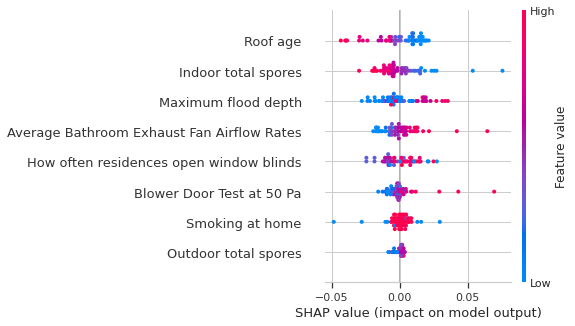

In [53]:
shap.summary_plot(shap_values, X, feature_names=features2)

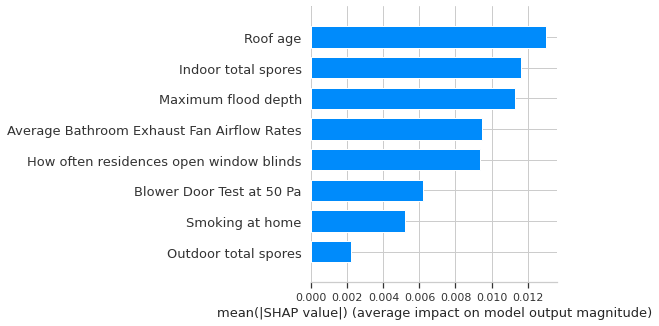

In [54]:
# Generate the SHAP summary BAR plot
shap.summary_plot(shap_values, Xtest, feature_names=features2, plot_type='bar')

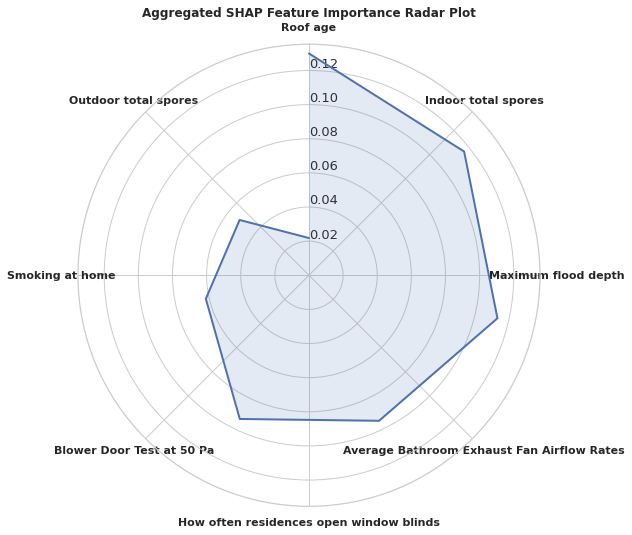

In [55]:
pi = np.pi

# Get mean absolute SHAP values across all instances
importances = np.abs(shap_values*10).mean(axis=0) 

# Sort features based on aggregated importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = np.array(selected_features)[sorted_indices]

# Number of variables (features)
n_vars = len(sorted_features)

# Radius / offset for labels
label_radius = 1.2 * max(sorted_importances)

# Init radar plot
fig, ax = plt.subplots(figsize=(8.5, 8.5), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
tick_positions = np.arange(0, 2*pi, 2*pi/n_vars)
plt.xticks(tick_positions, sorted_features, fontsize=11, fontweight='bold', rotation=0)


# font size of radial axis tick labels
ax.tick_params(axis='y', labelsize=13)

ax.set_rlabel_position(label_radius)

# Plot data
ax.plot(np.linspace(0, 2*pi, n_vars), sorted_importances, linewidth=2, linestyle='-')
ax.fill(np.linspace(0, 2*pi, n_vars), sorted_importances, alpha=0.15)

# Add legend / title / grid
plt.title("Aggregated SHAP Feature Importance Radar Plot", fontweight='bold')
ax.grid(True)

plt.show()

## Generating SHAP plots for each location

## LA

100%|██████████| 26/26 [00:10<00:00,  2.55it/s]


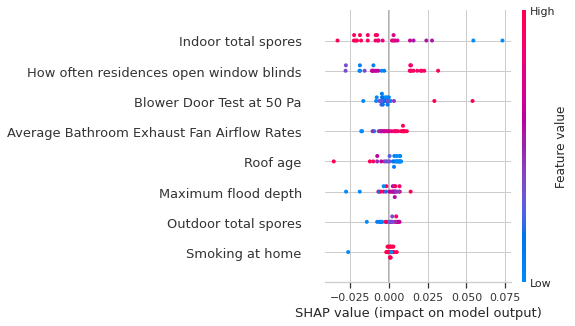

In [56]:
LA = df[df['Sampler State'] == 'Louisiana'].copy()
X_LA = np.float32(LA[selected_features].values)


# Create an explainer object for the best model
explainer = shap.KernelExplainer(keras_model_wrapper, X_LA)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_LA)


# Initialize SHAP's JavaScript visualization
shap.initjs()

shap.summary_plot(shap_values, X_LA, feature_names=features2)

In [57]:
# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'LA', 'NE', 'FL'])

# Get mean absolute SHAP values across all instances
importances = np.abs(shap_values*10).mean(axis=0) 

# Sort features based on aggregated importance
sorted_indices = np.argsort(importances[:8])[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = np.array(selected_features)[sorted_indices]

for i in range(len(sorted_features)):
    print(sorted_features[i], sorted_importances[i])
    results_df = results_df.append({'Feature': sorted_features[i], 'LA': sorted_importances[i]}, ignore_index=True)
    
results_df

Indoor total spores 0.17455506179178373
How often residences open window blinds 0.1543157812460906
Blower Door Test at 50 Pa 0.06774949405324485
Average Bathroom Exhaust Fan Airflow Rates 0.0669197068982945
Roof age 0.06429599416876516
Maximum flood depth 0.05753184199463349
Outdoor total spores 0.04098122098679176
Smoking at home 0.02419390616517022


,Feature,LA,NE,FL
0,Indoor total spores,0.174555,NaN,NaN
1,How often residences open window blinds,0.154316,NaN,NaN
2,Blower Door Test at 50 Pa,0.067749,NaN,NaN
3,Average Bathroom Exhaust Fan Airflow Rates,0.066920,NaN,NaN
4,Roof age,0.064296,NaN,NaN
5,Maximum flood depth,0.057532,NaN,NaN
6,Outdoor total spores,0.040981,NaN,NaN
7,Smoking at home,0.024194,NaN,NaN


## NE

100%|██████████| 8/8 [00:01<00:00,  6.53it/s]


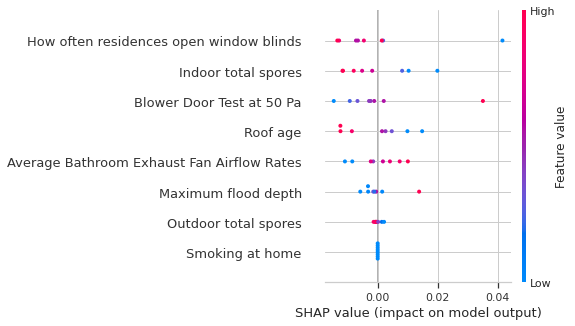

In [58]:
NE = df[df['Sampler State'] == 'Northeast'].copy()
X_NE = np.float32(NE[selected_features].values)

# Create an explainer object for the best model
explainer = shap.KernelExplainer(keras_model_wrapper, X_NE)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_NE)


# Initialize SHAP's JavaScript visualization
shap.initjs()

shap.summary_plot(shap_values, X_NE, feature_names=features2)

In [59]:
# Get mean absolute SHAP values across all instances
importances = np.abs(shap_values*10).mean(axis=0) 

# Sort features based on aggregated importance
sorted_indices = np.argsort(importances[:8])[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = np.array(selected_features)[sorted_indices]

for i in range(len(sorted_features)):
    print(sorted_features[i], sorted_importances[i])
    index = results_df[results_df['Feature'] == sorted_features[i]].index
    results_df.loc[index, 'NE'] = sorted_importances[i]
    
results_df

How often residences open window blinds 0.11207248215075744
Indoor total spores 0.09597924642176142
Blower Door Test at 50 Pa 0.09287541415098872
Roof age 0.08377893779072013
Average Bathroom Exhaust Fan Airflow Rates 0.058109444832163196
Maximum flood depth 0.03831380658916065
Outdoor total spores 0.009102306129144784
Smoking at home 0.0


,Feature,LA,NE,FL
0,Indoor total spores,0.174555,0.095979,NaN
1,How often residences open window blinds,0.154316,0.112072,NaN
2,Blower Door Test at 50 Pa,0.067749,0.092875,NaN
3,Average Bathroom Exhaust Fan Airflow Rates,0.066920,0.058109,NaN
4,Roof age,0.064296,0.083779,NaN
5,Maximum flood depth,0.057532,0.038314,NaN
6,Outdoor total spores,0.040981,0.009102,NaN
7,Smoking at home,0.024194,0.000000,NaN


## FL

100%|██████████| 28/28 [00:11<00:00,  2.45it/s]


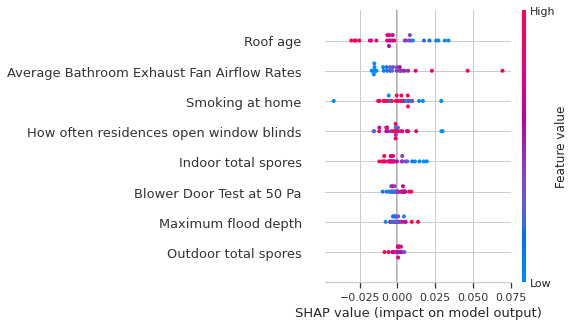

In [60]:
FL = df[df['Sampler State'] == 'Florida'].copy()
X_FL = np.float32(FL[selected_features].values)

# Create an explainer object for the best model
explainer = shap.KernelExplainer(keras_model_wrapper, X_FL)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_FL)


# Initialize SHAP's JavaScript visualization
shap.initjs()
shap.summary_plot(shap_values, X_FL, feature_names=features2)

In [61]:
# Get mean absolute SHAP values across all instances
importances = np.abs(shap_values*10).mean(axis=0) 

# Sort features based on aggregated importance
sorted_indices = np.argsort(importances[:8])[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = np.array(selected_features)[sorted_indices]

for i in range(len(sorted_features)):
    print(sorted_features[i], sorted_importances[i])
    index = results_df[results_df['Feature'] == sorted_features[i]].index
    print(index)
    results_df.loc[index, 'FL'] = sorted_importances[i]
    
results_df

Roof age 0.14520770832135949
Int64Index([4], dtype='int64')
Average Bathroom Exhaust Fan Airflow Rates 0.1226910950690218
Int64Index([3], dtype='int64')
Smoking at home 0.08603959287488708
Int64Index([7], dtype='int64')
How often residences open window blinds 0.07021849049188265
Int64Index([1], dtype='int64')
Indoor total spores 0.06747970867366222
Int64Index([0], dtype='int64')
Blower Door Test at 50 Pa 0.03790010620936736
Int64Index([2], dtype='int64')
Maximum flood depth 0.031048144561404124
Int64Index([5], dtype='int64')
Outdoor total spores 0.01744188456927339
Int64Index([6], dtype='int64')


,Feature,LA,NE,FL
0,Indoor total spores,0.174555,0.095979,0.067480
1,How often residences open window blinds,0.154316,0.112072,0.070218
2,Blower Door Test at 50 Pa,0.067749,0.092875,0.037900
3,Average Bathroom Exhaust Fan Airflow Rates,0.066920,0.058109,0.122691
4,Roof age,0.064296,0.083779,0.145208
5,Maximum flood depth,0.057532,0.038314,0.031048
6,Outdoor total spores,0.040981,0.009102,0.017442
7,Smoking at home,0.024194,0.000000,0.086040


## Plot all SHAP values for different locations in one plot

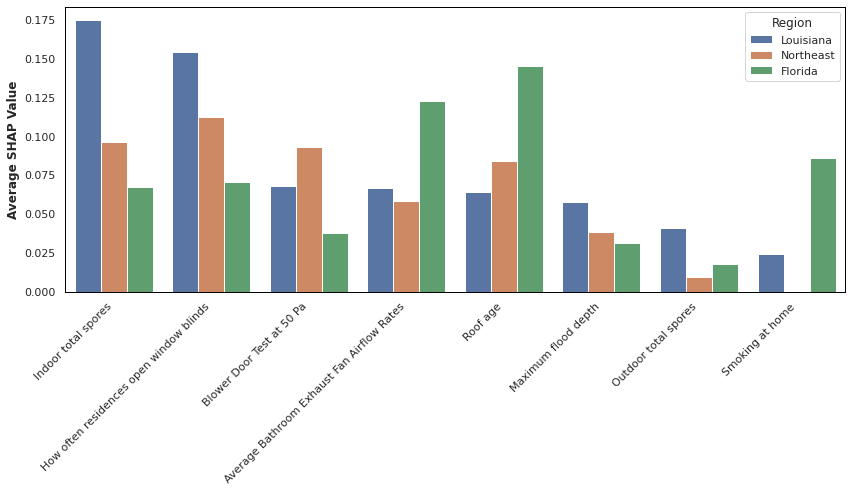

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
df_melted = results_df.melt(id_vars='Feature', var_name='Region', value_name='SHAP Value')

# Plotting
plt.figure(figsize=(12, 7))  # Adjusting figure size for better fit
plot = sns.barplot(x='Feature', y='SHAP Value', hue='Region', data=df_melted)

# Modify axes titles to bold
plt.xlabel('', fontweight='bold')
plt.ylabel('Average SHAP Value', fontweight='bold')

# Remove the title
plt.title('')

# Remove grid lines
plt.grid(False)

# Add a black border around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# Adjust legend title and explicitly write out the region names
legend_labels = {'LA': 'Louisiana', 'NE': 'Northeast', 'FL': 'Florida'}  # Update as per your actual region codes
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels[label] for label in labels], title='Region')

# Rotate x-axis labels to 45 degrees and align right for better fit
plt.xticks(rotation=45, ha='right')

# Adding some padding to the bottom to prevent clipping of tick-labels
plt.gcf().subplots_adjust(bottom=0.35)  

# Enhance the layout to accommodate changes
plt.tight_layout()

plt.show()
